In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


This block imports the crime data that is to be used throughout the project

In [ ]:
police_arrests = pd.read_csv("/content/drive/MyDrive/380 Project/Tucson_Police_Arrests_-_2021_-_Open_Data.csv")
police_arrests.head()

,OBJECTID,X,Y,arre_id,case_id,agency,date_arr,time_arr,datetime_arr,MONTH_ARR,...,LOC_STATUS,WARD,NHA_NAME,TMSECT,DIVISION,DIVISION_NO,DIVSECT,TRSQ,City_geo,ADDRESS_100BLK
0,1,9.900089e+05,470751.276735,2021000107,2101020104,TPD,2021/01/02 00:00:00+00,1731,2021/01/02 17:31:00+00,01-Jan,...,GEOCODED,3.0,NaN,NaN,Operations Division West,T2,T203,13S13E24NW,TUCSON,4598 N ORACLE RD
1,2,9.900089e+05,470751.276735,2021000107,2101020104,TPD,2021/01/02 00:00:00+00,1731,2021/01/02 17:31:00+00,01-Jan,...,GEOCODED,3.0,NaN,NaN,Operations Division West,T2,T203,13S13E24NW,TUCSON,4598 N ORACLE RD
2,3,9.900089e+05,470751.276735,2021000107,2101020104,TPD,2021/01/02 00:00:00+00,1731,2021/01/02 17:31:00+00,01-Jan,...,GEOCODED,3.0,NaN,NaN,Operations Division West,T2,T203,13S13E24NW,TUCSON,4598 N ORACLE RD
3,4,1.053154e+06,443419.380064,2021000110,2101020138,TPD,2021/01/02 00:00:00+00,1844,2021/01/02 18:44:00+00,01-Jan,...,GEOCODED,2.0,Eastside,NaN,Operations Division East,T4,T406,14S15E14NE,TUCSON,10198 E ESSEX VILLAGE DR
4,5,1.053154e+06,443419.380064,2021000110,2101020138,TPD,2021/01/02 00:00:00+00,1844,2021/01/02 18:44:00+00,01-Jan,...,GEOCODED,2.0,Eastside,NaN,Operations Division East,T4,T406,14S15E14NE,TUCSON,10198 E ESSEX VILLAGE DR


Organizes and cleans the data by cutting out unused features and by excluding data that has a very small presence (such as 'S' when categorizing felony or misdemeanor)

It then renames the features to be more cohesive and understandable

In [ ]:
# cut unwanted columns out of the data frame and drop null values
selected_columns = ["age", "race", "sex", "NHA_NAME", "fel_misd"]
police_arrests_data = police_arrests[selected_columns]
police_arrests_data = police_arrests_data.dropna()

# Exclude random oddities from data ('C' or 'S' when it should be 'F' or 'M' etc.)
excluded_values = ['U', 'E', 'O']
police_arrests_data = police_arrests_data[~police_arrests['race'].isin(excluded_values)]

excluded_values = ['U']
police_arrests_data = police_arrests_data[~police_arrests_data['sex'].isin(excluded_values)]

excluded_values = ['C', 'S', 'P']
police_arrests_data = police_arrests_data[~police_arrests_data['fel_misd'].isin(excluded_values)]

# renames data frame features
police_arrests_data = police_arrests_data.rename(columns={"NHA_NAME": "NEIGHBORHOOD", "age": "AGE", "race": "RACE", "sex": "SEX", "fel_misd": "FELONY/MISDEMEANOR"})
police_arrests_data["FELONY/MISDEMEANOR"] = police_arrests_data["FELONY/MISDEMEANOR"].replace({'F': 1, 'M':1})

police_arrests_data

<ipython-input-41-9aeafde62654>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  police_arrests_data = police_arrests_data[~police_arrests['race'].isin(excluded_values)]
<ipython-input-41-9aeafde62654>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  police_arrests_data["FELONY/MISDEMEANOR"] = police_arrests_data["FELONY/MISDEMEANOR"].replace({'F': 1, 'M':1})


,AGE,RACE,SEX,NEIGHBORHOOD,FELONY/MISDEMEANOR
3,15,B,M,Eastside,1
4,15,B,M,Eastside,1
5,25,H,F,Rita Ranch,1
6,34,B,M,Garden District,1
8,34,B,M,Garden District,1
...,...,...,...,...,...
41606,24,W,M,Corbett,1
41607,49,W,F,Amphi,1
41608,22,H,M,Flowing Wells,1
41612,22,H,M,Flowing Wells,1


Imports Neighborhood income dataset:

In [ ]:
neighborhood_data = pd.read_csv('/content/drive/MyDrive/380 Project/Neighborhood_Income.csv')
neighborhood_data

,OBJECTID,NAME,WARD,DATASOURCE,ID,sourceCountry,ENRICH_FID,aggregationMethod,populationToPolygonSizeRating,apportionmentConfidence,...,AGGDIA75CY,ID_1,sourceCountry_1,ENRICH_FID_1,aggregationMethod_1,populationToPolygonSizeRating_1,apportionmentConfidence_1,HasData_1,TOTHH_CY,WLTHINDXCY
0,1,A Mountain,1,NEIGHBORHOODS,0,US,1,BlockApportionment:US.BlockGroups,2.191,2.576,...,1590160,0,US,1,BlockApportionment:US.BlockGroups,2.191,2.576,1,1103,32
1,2,Adelanto,3,NEIGHBORHOODS,1,US,2,BlockApportionment:US.BlockGroups,2.191,2.576,...,154598,1,US,2,BlockApportionment:US.BlockGroups,2.191,2.576,1,117,28
2,3,Alvernon Heights,5,NEIGHBORHOODS,2,US,3,BlockApportionment:US.BlockGroups,2.191,2.576,...,172634,2,US,3,BlockApportionment:US.BlockGroups,2.191,2.576,1,99,26
3,4,Amphi,3,NEIGHBORHOODS,3,US,4,BlockApportionment:US.BlockGroups,2.191,2.576,...,2760918,3,US,4,BlockApportionment:US.BlockGroups,2.191,2.576,1,3105,20
4,5,Armory Park,6,NEIGHBORHOODS,4,US,5,BlockApportionment:US.BlockGroups,2.191,2.576,...,3785750,4,US,5,BlockApportionment:US.BlockGroups,2.191,2.576,1,1223,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,155,West Lamar City Acres,5,NEIGHBORHOODS,4,US,155,BlockApportionment:US.BlockGroups,2.191,2.576,...,551257,4,US,155,BlockApportionment:US.BlockGroups,2.191,2.576,1,121,46
155,156,Loma Verde,6,NEIGHBORHOODS,5,US,156,BlockApportionment:US.BlockGroups,2.191,2.576,...,1304822,5,US,156,BlockApportionment:US.BlockGroups,2.191,2.576,1,233,73
156,157,Downtown,1,NEIGHBORHOODS,6,US,157,BlockApportionment:US.BlockGroups,2.191,2.576,...,120300,6,US,157,BlockApportionment:US.BlockGroups,2.191,2.576,1,111,26
157,158,Barrio Santa Cruz,1,NEIGHBORHOODS,7,US,158,BlockApportionment:US.BlockGroups,2.191,2.576,...,140148,7,US,158,BlockApportionment:US.BlockGroups,2.191,2.576,1,64,33


Imports Tree Equity Score dataset, which contains a lot of useful data such as population density

In [ ]:
tree_data = pd.read_csv('/content/drive/MyDrive/380 Project/Tree_Scores.csv')
tree_data

,OBJECTID,Neighborhood Name,Primary Ward,HasData,ORIGINAL_OID,Percent Minority Population,Total Population,Population Under 200% of Poverty,Population for which poverty status is determined,"Percent Non-Working Age (0-17, 65+)",...,TreeEquityScore,PCTPoverty,Status,TES,AreaSqMi,PopDens_SqMi,PriorityCategory,Shape__Area,Shape__Length,Percent Working Age (18-64)
0,1,Longview Estates,2,1.0,111.0,45.52,1105.0,854.0,1265.0,41.99,...,78.370669,32.490119,02 Upper-Moderate Priority,64 - 79,0.254740,4337.757648,High Priority,7.141846e+06,10707.939420,58.01
1,2,Silvercroft,1,1.0,68.0,91.18,340.0,112.0,360.0,39.71,...,68.051592,68.888889,02 Upper-Moderate Priority,64 - 79,0.098969,3435.408317,High Priority,2.759056e+06,7826.919578,60.29
2,3,Saguaro Hill,6,1.0,414.0,38.05,318.0,143.0,239.0,39.31,...,88.880939,40.167364,03 Low-Moderate Priority,79 - 89,0.063170,5034.065928,Moderate Priority,1.761114e+06,6656.653491,60.69
3,4,Balboa Heights,3,1.0,5.0,74.56,1576.0,657.0,1604.0,33.57,...,80.780162,59.039900,03 Low-Moderate Priority,79 - 89,0.180307,8740.645224,Moderate Priority,5.026644e+06,9108.348741,66.43
4,5,Plaza Del Sol,1,1.0,171.0,92.43,1902.0,564.0,1719.0,38.28,...,90.927149,67.190227,04 Low Priority,89 - 99,0.151726,12535.779956,Low Priority,4.229831e+06,10599.694449,61.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,462,Valle Trinidad,1,0.0,223.0,0.00,0.0,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,0.043600,0.000000,NaN,1.215454e+06,4931.510509,0.00
462,463,Reddington Hills,4,1.0,327.0,38.86,332.0,256.0,316.0,37.95,...,72.449318,18.987342,02 Upper-Moderate Priority,64 - 79,0.299745,1107.608376,High Priority,8.357111e+06,15817.666130,62.05
463,464,Desert Anchors,2,1.0,108.0,22.03,59.0,41.0,46.0,49.15,...,NaN,10.869565,NaN,NaN,0.012283,4803.253348,NaN,3.424596e+05,2785.724201,50.85
464,465,Goldschmidts,1,0.0,214.0,0.00,0.0,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,0.007571,0.000000,NaN,2.110617e+05,2143.883350,0.00


This block selects the most useful data from the neighborhood and tree data frames and drops the rest. It then renames the features to be more understandable

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import numpy as np

# Drops unused features frm neighborhood data frame and renames the rest
selected_columns = ['NAME', 'MEDHINC_CY', 'AVGHINC_CY', 'PCI_CY', 'MEDDI_CY', 'MEDHHR_CY', 'TOTHH_CY', 'AGGINC_CY']
neighborhood_data = neighborhood_data[selected_columns]
neighborhood_data = neighborhood_data.rename(columns={'NAME': 'NEIGHBORHOOD','MEDHINC_CY': 'MED HH INCOME', 'AVGHINC_CY': 'AVG HH INCOME', 'PCI_CY': 'PER CAPITA INCOME', 'MEDDI_CY': 'MED DISCRETIONARY', 'AGGDI_CY': 'AGGREGATE DISCRETIONARY', 'MEDHHR_CY': 'MED HOUSEHOLDER AGE', 'WLTHINDXCY': 'WEALTH INDEX', 'TOTHH_CY': 'HH COUNT', 'AGGINC_CY': 'AGGREGATE'})
neighborhood_data.dropna()

# Drops unused features frm tree equity score data frame and renames the rest
selected_columns = ["Neighborhood Name", "Total Population", "Population Under 200% of Poverty", "Percent Unemployed", "TreeEquityScore", "PCTPoverty", "PopDens_SqMi", "Percent Working Age (18-64)"]
tree_data = tree_data[selected_columns]
tree_data = tree_data.rename(columns={"Neighborhood Name": "NEIGHBORHOOD", "Total Population": "POPULATION"})
tree_data.dropna()

,NEIGHBORHOOD,POPULATION,Population Under 200% of Poverty,Percent Unemployed,TreeEquityScore,PCTPoverty,PopDens_SqMi,Percent Working Age (18-64)
0,Longview Estates,1105.0,854.0,10.93,78.370669,32.490119,4337.757648,58.01
1,Silvercroft,340.0,112.0,25.27,68.051592,68.888889,3435.408317,60.29
2,Saguaro Hill,318.0,143.0,16.76,88.880939,40.167364,5034.065928,60.69
3,Balboa Heights,1576.0,657.0,22.17,80.780162,59.039900,8740.645224,66.43
4,Plaza Del Sol,1902.0,564.0,16.48,90.927149,67.190227,12535.779956,61.72
...,...,...,...,...,...,...,...,...
455,Southland Park,2153.0,177.0,22.35,66.328280,85.491803,8094.971732,56.53
457,Mountain View,1507.0,563.0,16.96,81.515674,48.301194,5907.953001,66.03
459,Swan Way Park,1081.0,655.0,10.02,86.563292,43.873179,4308.046385,67.25
460,Columbus Village,846.0,294.0,29.36,60.659224,66.129032,6746.586612,61.35


Merges the data frames together based on the neighborhood of the crime. It then finds the number of crimes for each neighborhood and calculates the crime rate of each neighborhood

In [ ]:
# Find the number of total crimes for each neighborhood
crime_summary = police_arrests_data.groupby('NEIGHBORHOOD')['FELONY/MISDEMEANOR'].sum().reset_index()
print(crime_summary)

# rename the column that used to be felony/misdemeanor to be total crimes
crime_summary.rename(columns={'FELONY/MISDEMEANOR': 'TOTAL CRIMES'}, inplace=True)

# merge the data frames
crime_summary = pd.merge(crime_summary, neighborhood_data, on='NEIGHBORHOOD')
crime_summary = pd.merge(crime_summary, tree_data, on='NEIGHBORHOOD')
crime_summary.dropna()

#crime_summary['POPULATION'] = crime_summary['AGGREGATE'] // crime_summary['PER CAPITA INCOME']
crime_summary['CRIME RATE'] = (crime_summary['TOTAL CRIMES'] / crime_summary['POPULATION']) * (100000)
crime_summary = crime_summary[crime_summary['CRIME RATE'] < 100000];

# shuffle the data frame
i = np.random.permutation(crime_summary.index)
crime_summary = crime_summary.loc[i].reset_index(drop=True)

print(crime_summary["TOTAL CRIMES"].sum(), "", crime_summary["POPULATION"].sum())
crime_summary

             NEIGHBORHOOD  FELONY/MISDEMEANOR
0              A Mountain                  87
1                Adelanto                   7
2             Aldea Linda                   1
3        Alvernon Heights                  23
4                   Amphi                1726
..                    ...                 ...
154       West University                 535
155      Western Hills II                  29
156  Westside Development                  72
157      Wilshire Heights                   4
158           Winterhaven                  18

[159 rows x 2 columns]
27582  385860.0


,NEIGHBORHOOD,TOTAL CRIMES,MED HH INCOME,AVG HH INCOME,PER CAPITA INCOME,MED DISCRETIONARY,MED HOUSEHOLDER AGE,HH COUNT,AGGREGATE,POPULATION,Population Under 200% of Poverty,Percent Unemployed,TreeEquityScore,PCTPoverty,PopDens_SqMi,Percent Working Age (18-64),CRIME RATE
0,Cabrini,49,37715,44967,21131,33464,43.5,961,43719320,2064.0,987.0,13.14,98.372337,50.773067,8381.528782,71.27,2374.031008
1,Keeling,453,22395,30903,12543,19649,43.6,1899,59741539,4847.0,1100.0,24.48,84.039950,75.174904,7563.220543,67.03,9345.987209
2,Aldea Linda,1,57261,67102,25710,51784,55.9,88,5707633,233.0,141.0,7.69,94.807408,25.789474,2939.352536,61.37,429.184549
3,Santiago Hills,6,64541,73799,33740,54031,60.6,426,30534712,889.0,785.0,9.79,86.523940,21.656687,3222.373323,56.13,674.915636
4,Toumey Park,108,26754,38674,13733,24074,45.8,841,32601697,2236.0,749.0,10.80,82.861850,57.897695,8168.994166,62.08,4830.053667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Rosemont West,70,51040,61017,23995,43156,54.7,624,38223728,1596.0,948.0,12.93,81.681778,45.611015,4023.466285,59.52,4385.964912
147,Doolen-Fruitvale,139,35976,47324,20135,31981,45.1,795,37472115,1870.0,912.0,13.69,91.262555,56.279962,7498.439343,64.44,7433.155080
148,Arroyo Chico,163,40806,56684,24229,35435,53.3,1244,72904032,3035.0,1944.0,10.98,76.699920,33.080895,4007.921809,64.98,5370.675453
149,Palo Verde,392,33659,50281,24825,29578,46.7,2737,139070307,5641.0,2387.0,16.19,96.309930,52.345778,5696.463723,69.21,6949.122496


Deletes outliers and plots the logarithmic regression function of crime rate and median household income.

7141.173495498103  7557.7050998459945
0.30480798579228496   0.6851321228663692
-0.6039475750091727


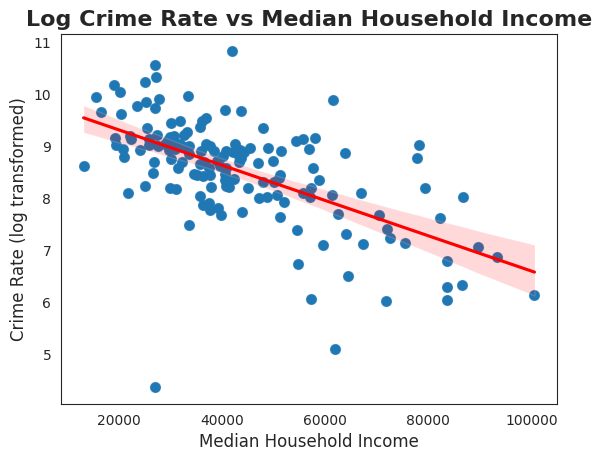

0.8325816353295336


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# finds standard deviation and mean of the crime rates in order to find the outliers
dev = crime_summary['CRIME RATE'].std()
mean = crime_summary['CRIME RATE'].mean()
print(dev, "", mean)

# finds standard deviation and mean of the Median Household income in order to find the outliers
x_dev = crime_summary['MED HH INCOME'].std()
x_mean = crime_summary['MED HH INCOME'].mean()

# deletes all outliers
crime_summary_toPlot = crime_summary[crime_summary['CRIME RATE'] < mean+3*dev]
crime_summary_toPlot = crime_summary[crime_summary['CRIME RATE'] > mean-3*dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['CRIME RATE'] > 0]

crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['MED HH INCOME'] < x_mean+3*x_dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['MED HH INCOME'] > x_mean-3*x_dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['MED HH INCOME'] > 0]

# Plots Median Household income to log crime rate
x = crime_summary_toPlot['MED HH INCOME'].values.reshape(-1, 1)
y = crime_summary_toPlot["CRIME RATE"]
# logs crime rate
y = np.log(y)

# builds train and test splits
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

# trains the model on the training split
lr = LinearRegression()
lr.fit(x_train, y_train)

# calculate the r^2 of the training split and then predict y_test based test split
r2 = lr.score(x_train, y_train)
y_pred = lr.predict(x_test)

# calculate the r^2 of the test split
r2T = r2_score(y_test, y_pred)
print(r2, " ", r2T)

# Rest of block plots the regression

sns.set_style("white")
plt.scatter(x, y)
# finds the correlation coefficient
cor = crime_summary_toPlot['MED HH INCOME'].corr(y)
print(cor)

sns.regplot(x=x, y=y, line_kws={"color": "red"}, scatter_kws={"s": 50, "alpha": 0.7})
plt.title('Log Crime Rate vs Median Household Income', fontsize=16, fontweight='bold')
plt.xlabel('Median Household Income', fontsize=12)
plt.ylabel('Crime Rate (log transformed)', fontsize=12)
plt.show()

# finds the variance
print(y_test.var())

Computes the optimal regression decision tree for our data. We first have to drop correlated data such as crime rate and total crimes as these would obviously be used to heavily in the decision tree. We then found optimal parameters for our decision tree by brute force testing

Mean Squared Error: 0.56
Mean Absolute Error: 0.60
r2 Score: 0.56


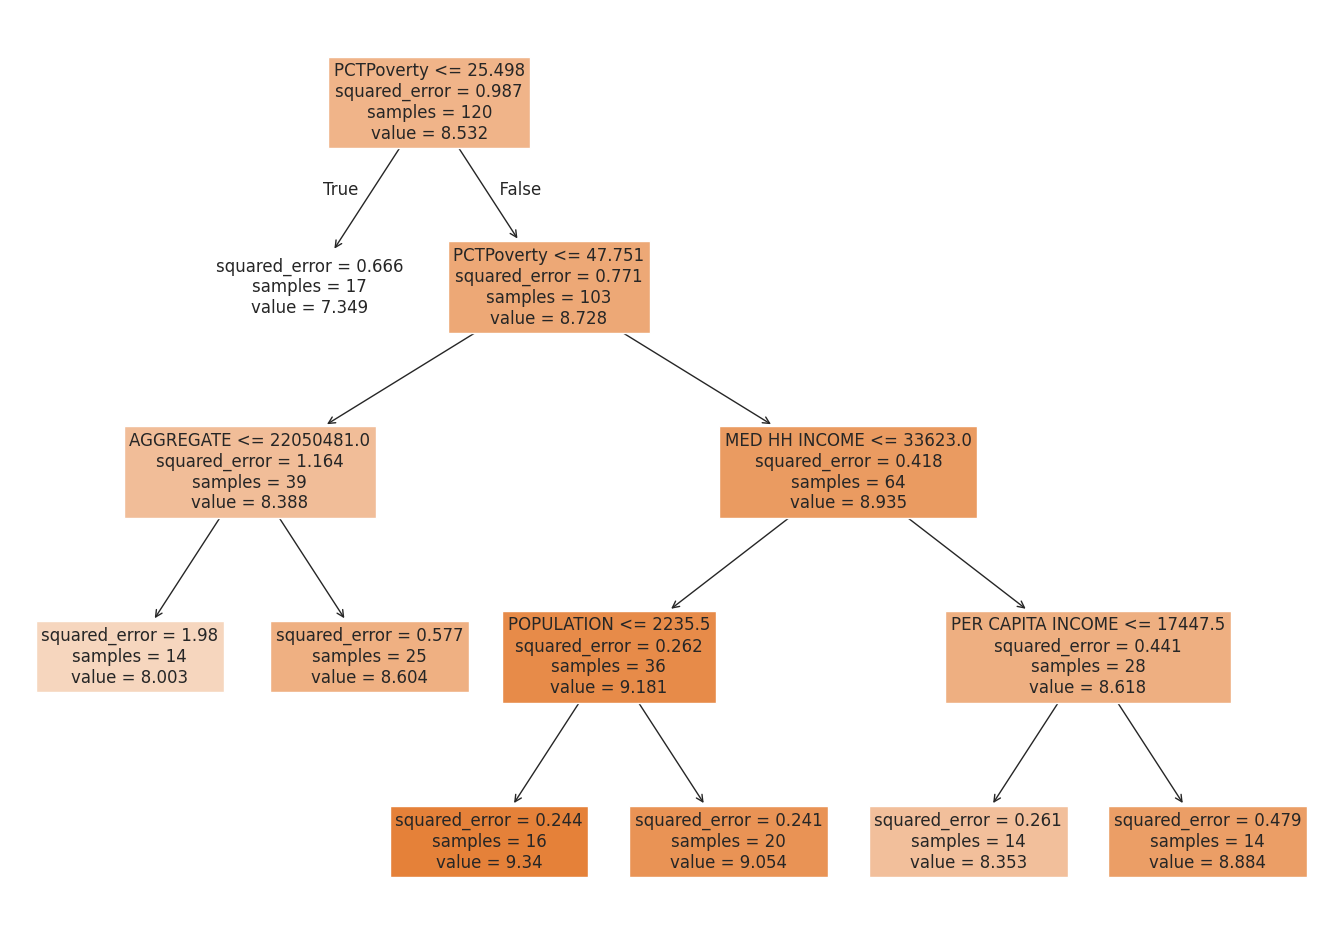



 CRIME RATE    1.313319
dtype: float64


In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.tree import plot_tree
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

#i = np.random.permutation(crime_summary_toPlot.index)
#crime_summary_toPlot = crime_summary_toPlot.loc[i].reset_index(drop=True)

# Drops unwanted data and creates the test and train splits
x = crime_summary_toPlot.drop(columns=["NEIGHBORHOOD", "CRIME RATE", "TOTAL CRIMES"])
y = crime_summary_toPlot[["CRIME RATE"]]
y = np.log(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

# Builds the decision tree regressor and fits it to the training data
regressor = DecisionTreeRegressor(max_depth=4, min_samples_leaf=13, random_state=0)
regressor.fit(x_train, y_train)

# Make predictions
y_pred = regressor.predict(x_test)

# Evaluate performance based on metrics like mse, mae, and r squared
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

r2 = r2_score(y_test, y_pred)
print(f"r2 Score: {r2:.2f}")

# finds the text based representation of teh tree (not used)
tree_rules = export_text(regressor, feature_names=crime_summary_toPlot.drop(columns=["NEIGHBORHOOD", "CRIME RATE", "TOTAL CRIMES"]).columns)
#print(tree_rules)

# plots te data tree visualization
plt.figure(figsize=(17, 12))
plot_tree(regressor, feature_names=crime_summary_toPlot.drop(columns=["NEIGHBORHOOD", "CRIME RATE", "TOTAL CRIMES"]).columns, class_names=["CRIME RATE"], filled=True, fontsize=12)

plt.show()

# finds crime rate test variance
print("\n\n", y_test.var())

Deletes outliers and plots the logarithmic regression function of crime rate and tree equity score.

0.09064604060674741   -0.12011236834816819
-0.225978659104201


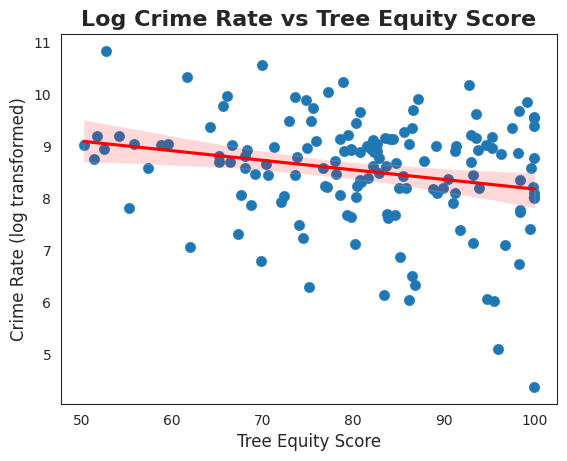

1.2724754295961325


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


# finds and drops outliers
x = crime_summary['TreeEquityScore'].values.reshape(-1, 1)
y = crime_summary["CRIME RATE"]

dev = crime_summary['CRIME RATE'].std()
mean = crime_summary['CRIME RATE'].mean()

x_dev = crime_summary['TreeEquityScore'].std()
x_mean = crime_summary['TreeEquityScore'].mean()

crime_summary_toPlot = crime_summary[crime_summary['CRIME RATE'] < mean+3*dev]
crime_summary_toPlot = crime_summary[crime_summary['CRIME RATE'] > mean-3*dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['CRIME RATE'] > 0]

crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['TreeEquityScore'] < x_mean+3*x_dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['TreeEquityScore'] > x_mean-3*x_dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['TreeEquityScore'] > 0]

# splits dataframe and logs the crime rate
x = crime_summary_toPlot['TreeEquityScore'].values.reshape(-1, 1)
y = crime_summary_toPlot["CRIME RATE"]
y = np.log(y)

# creates test and train splits
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

# fits the linear regression model based on our selected features
lr = LinearRegression()
lr.fit(x_train, y_train)

# computes r^2 of the training split
r2 = lr.score(x_train, y_train)

# predicts test values and finds the r^2 of the test split
y_pred = lr.predict(x_test)
r2T = r2_score(y_test, y_pred)
print(r2, " ", r2T)

#plots the regression and prints useful values like correlation and variance
sns.set_style("white")
plt.scatter(x, y)

cor = crime_summary_toPlot['TreeEquityScore'].corr(y)
print(cor)

sns.regplot(x=x, y=y, line_kws={"color": "red"}, scatter_kws={"s": 50, "alpha": 0.7})
plt.title('Log Crime Rate vs Tree Equity Score', fontsize=16, fontweight='bold')
plt.xlabel('Tree Equity Score', fontsize=12)
plt.ylabel('Crime Rate (log transformed)', fontsize=12)
plt.show()

print(y_test.var())

Deletes outliers and plots the logarithmic regression function of crime rate and percent of the population that is unemployed.

0.08959065501461738   0.10609383645596071
0.30853578892881206


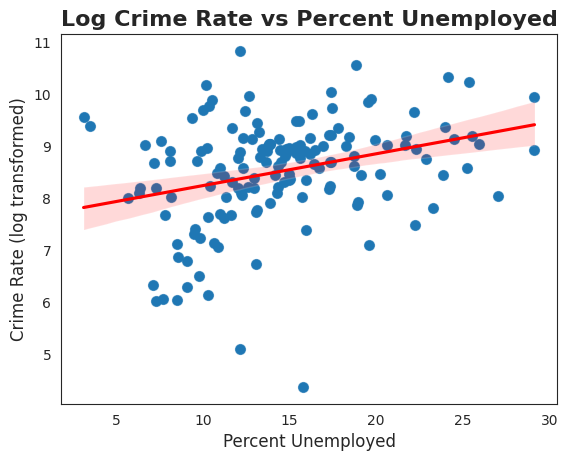

0.8238853801146848


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# finds and drops outliers
x = crime_summary['Percent Unemployed'].values.reshape(-1, 1)
y = crime_summary["Percent Unemployed"]

dev = crime_summary['CRIME RATE'].std()
mean = crime_summary['CRIME RATE'].mean()

x_dev = crime_summary['Percent Unemployed'].std()
x_mean = crime_summary['Percent Unemployed'].mean()

crime_summary_toPlot = crime_summary[crime_summary['CRIME RATE'] < mean+3*dev]
crime_summary_toPlot = crime_summary[crime_summary['CRIME RATE'] > mean-3*dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['CRIME RATE'] > 0]

crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['Percent Unemployed'] < x_mean+3*x_dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['Percent Unemployed'] > x_mean-3*x_dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['Percent Unemployed'] > 0]

# splits dataframe and logs the crime rate
x = crime_summary_toPlot['Percent Unemployed'].values.reshape(-1, 1)
y = crime_summary_toPlot["CRIME RATE"]
y = np.log(y)

# creates test and train splits
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

# fits the linear regression model based on our selected features
lr = LinearRegression()
lr.fit(x_train, y_train)

# computes r^2 of the training split
r2 = lr.score(x_train, y_train)

# predicts test values and finds the r^2 of the test split
y_pred = lr.predict(x_test)

r2T = r2_score(y_test, y_pred)
print(r2, " ", r2T)

#plots the regression and prints useful values like correlation and variance
sns.set_style("white")
plt.scatter(x, y)

cor = crime_summary_toPlot['Percent Unemployed'].corr(y)
print(cor)

sns.regplot(x=x, y=y, line_kws={"color": "red"}, scatter_kws={"s": 50, "alpha": 0.7})
plt.title('Log Crime Rate vs Percent Unemployed', fontsize=16, fontweight='bold')
plt.xlabel('Percent Unemployed', fontsize=12)
plt.ylabel('Crime Rate (log transformed)', fontsize=12)
plt.show()

print(y_test.var())

Deletes outliers and plots the logarithmic regression function of crime rate and population density per square mile.

0.00020986114135934653   -0.04110438849431297
0.11088511773061026


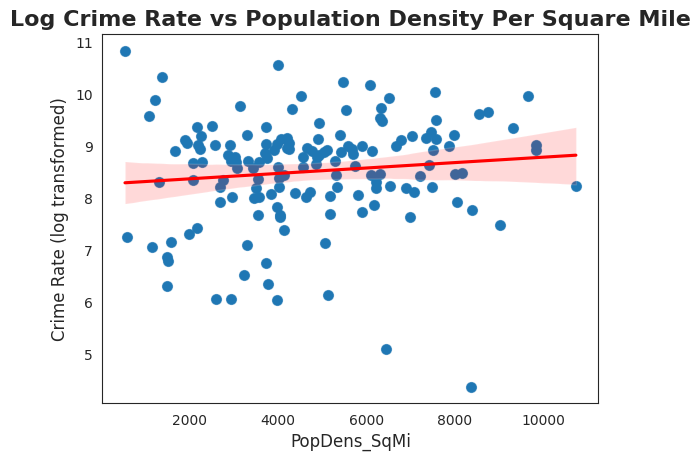

0.8831538731916907


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# finds and drops outliers
x = crime_summary['PopDens_SqMi'].values.reshape(-1, 1)
y = crime_summary["PopDens_SqMi"]

dev = crime_summary['CRIME RATE'].std()
mean = crime_summary['CRIME RATE'].mean()

x_dev = crime_summary['PopDens_SqMi'].std()
x_mean = crime_summary['PopDens_SqMi'].mean()

crime_summary_toPlot = crime_summary[crime_summary['CRIME RATE'] < mean+3*dev]
crime_summary_toPlot = crime_summary[crime_summary['CRIME RATE'] > mean-3*dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['CRIME RATE'] > 0]

crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['PopDens_SqMi'] < x_mean+3*x_dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['PopDens_SqMi'] > x_mean-3*x_dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['PopDens_SqMi'] > 0]

# splits dataframe and logs the crime rate
x = crime_summary_toPlot['PopDens_SqMi'].values.reshape(-1, 1)
y = crime_summary_toPlot["CRIME RATE"]
y = np.log(y)

# creates test and train splits
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

# fits the linear regression model based on our selected features
lr = LinearRegression()
lr.fit(x_train, y_train)

# computes r^2 of the training split
r2 = lr.score(x_train, y_train)

# predicts test values and finds the r^2 of the test split
y_pred = lr.predict(x_test)

r2T = r2_score(y_test, y_pred)
print(r2, " ", r2T)
sns.set_style("white")
plt.scatter(x, y)

# plots the regression and prints useful values like correlation and variance
cor = crime_summary_toPlot['PopDens_SqMi'].corr(y)
print(cor)

sns.regplot(x=x, y=y, line_kws={"color": "red"}, scatter_kws={"s": 50, "alpha": 0.7})
plt.title('Log Crime Rate vs Population Density Per Square Mile', fontsize=16, fontweight='bold')
plt.xlabel('PopDens_SqMi', fontsize=12)
plt.ylabel('Crime Rate (log transformed)', fontsize=12)
plt.show()

print(y_test.var())

Deletes outliers and plots the logarithmic regression function of crime rate and percent of the population that is living under poverty.

0.2629814368889998   0.4111328763748603
0.5415071750595145


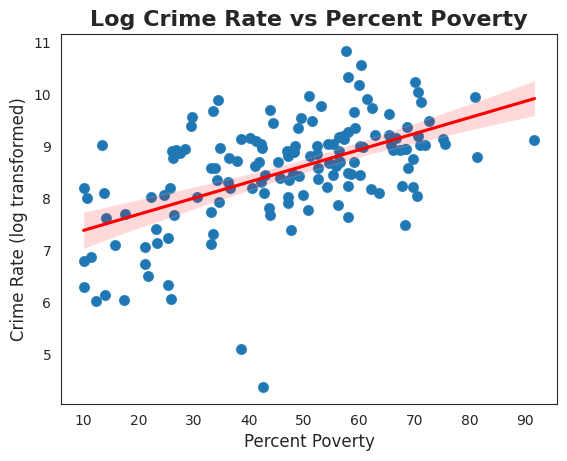

1.0059973732863317


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# finds and drops outliers
x = crime_summary['PCTPoverty'].values.reshape(-1, 1)
y = crime_summary["CRIME RATE"]

# splits dataframe and logs the crime rate
dev = crime_summary['CRIME RATE'].std()
mean = crime_summary['CRIME RATE'].mean()

x_dev = crime_summary['PCTPoverty'].std()
x_mean = crime_summary['PCTPoverty'].mean()

crime_summary_toPlot = crime_summary[crime_summary['CRIME RATE'] < mean+3*dev]
crime_summary_toPlot = crime_summary[crime_summary['CRIME RATE'] > mean-3*dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['CRIME RATE'] > 0]

crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['PCTPoverty'] < x_mean+3*x_dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['PCTPoverty'] > x_mean-3*x_dev]
crime_summary_toPlot = crime_summary_toPlot[crime_summary_toPlot['PCTPoverty'] > 0]

# splits dataframe and logs the crime rate
x = crime_summary_toPlot['PCTPoverty'].values.reshape(-1, 1)
y = crime_summary_toPlot["CRIME RATE"]
y = np.log(y)

# creates test and train splits
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

# fits the linear regression model based on our selected features
lr = LinearRegression()
lr.fit(x_train, y_train)

# computes r^2 of the training split
r2 = lr.score(x_train, y_train)

# predicts test values and finds the r^2 of the test split
y_pred = lr.predict(x_test)
r2T = r2_score(y_test, y_pred)
print(r2, " ", r2T)

# plots the regression and prints useful values like correlation and variance
sns.set_style("white")
plt.scatter(x, y)

cor = crime_summary_toPlot['PCTPoverty'].corr(y)
print(cor)

sns.regplot(x=x, y=y, line_kws={"color": "red"}, scatter_kws={"s": 50, "alpha": 0.7})
plt.title('Log Crime Rate vs Percent Poverty', fontsize=16, fontweight='bold')
plt.xlabel('Percent Poverty', fontsize=12)
plt.ylabel('Crime Rate (log transformed)', fontsize=12)
plt.show()

print(y_test.var())

Finds and plots the correlation heatmap of our dataframe

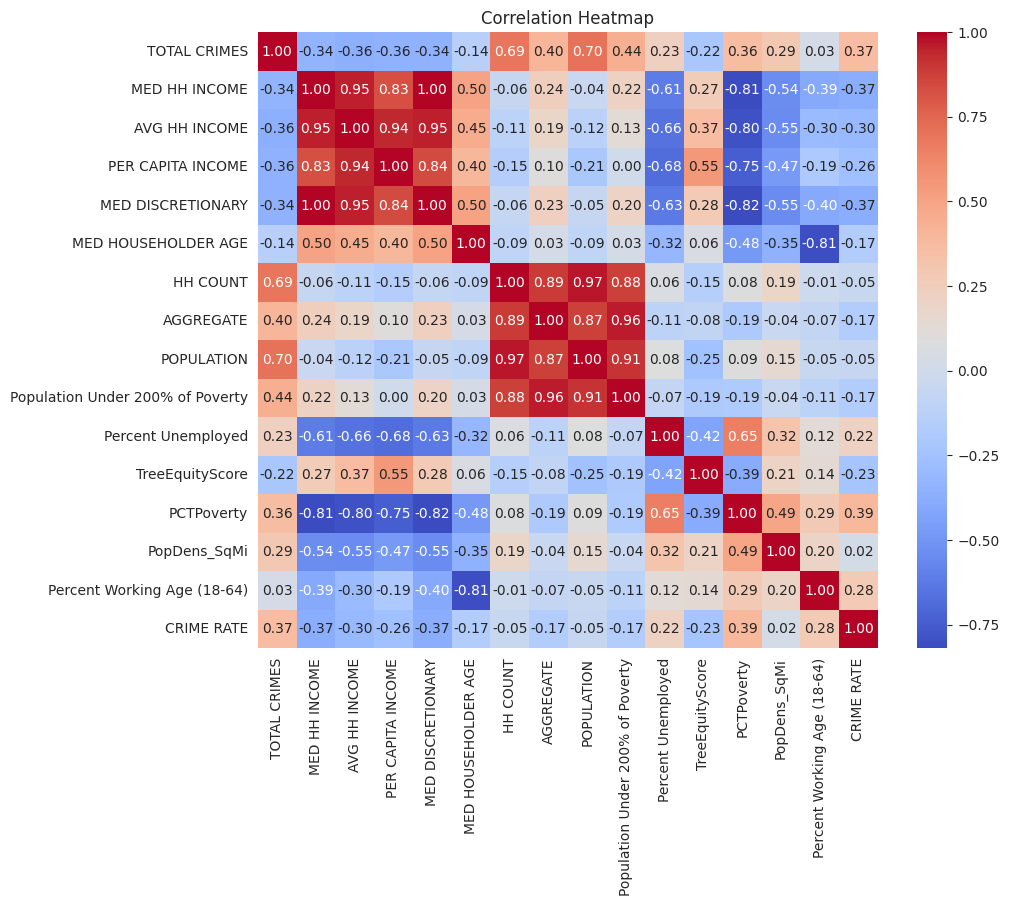

In [ ]:
# Selects only numerical features from our dataframe
crime_summary_toPlot_numeric = crime_summary_toPlot.select_dtypes(include=["number"])

#creates a correlation matrix
correlation_matrix = crime_summary_toPlot_numeric.corr()

# Creates and displays the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Prints the correlation matrix
correlation_matrix["CRIME RATE"]

,CRIME RATE
TOTAL CRIMES,0.367768
MED HH INCOME,-0.374048
AVG HH INCOME,-0.304915
PER CAPITA INCOME,-0.259463
MED DISCRETIONARY,-0.374530
MED HOUSEHOLDER AGE,-0.167493
HH COUNT,-0.048083
AGGREGATE,-0.171912
POPULATION,-0.054349
Population Under 200% of Poverty,-0.166323


Finds the parameters that result in the best evaluation of the model

In [ ]:
for max_depth in range(2,7):
  for min_samples_leaf in range(7, 20):
    regressor = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=0)
    regressor.fit(x_train, y_train)

    print(str(max_depth) + " " + str(min_samples_leaf))
    # Make predictions
    y_pred = regressor.predict(x_test)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")

    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error: {mae:.2f}")

    r2 = r2_score(y_test, y_pred)
    print(f"r2 Score: {r2:.2f}")

2 7
Mean Squared Error: 34877856.47
Mean Absolute Error: 4288.54
r2 Score: -0.49
2 8
Mean Squared Error: 34877856.47
Mean Absolute Error: 4288.54
r2 Score: -0.49
2 9
Mean Squared Error: 34877856.47
Mean Absolute Error: 4288.54
r2 Score: -0.49
2 10
Mean Squared Error: 34877856.47
Mean Absolute Error: 4288.54
r2 Score: -0.49
2 11
Mean Squared Error: 34877856.47
Mean Absolute Error: 4288.54
r2 Score: -0.49
2 12
Mean Squared Error: 34877856.47
Mean Absolute Error: 4288.54
r2 Score: -0.49
2 13
Mean Squared Error: 34877856.47
Mean Absolute Error: 4288.54
r2 Score: -0.49
2 14
Mean Squared Error: 34877856.47
Mean Absolute Error: 4288.54
r2 Score: -0.49
2 15
Mean Squared Error: 34877856.47
Mean Absolute Error: 4288.54
r2 Score: -0.49
2 16
Mean Squared Error: 34877856.47
Mean Absolute Error: 4288.54
r2 Score: -0.49
2 17
Mean Squared Error: 34877856.47
Mean Absolute Error: 4288.54
r2 Score: -0.49
2 18
Mean Squared Error: 29033586.51
Mean Absolute Error: 3814.08
r2 Score: -0.24
2 19
Mean Squared E

Checks to see that our decision tree is able to make predictions better than simply predicting the mean crime rate every time

In [ ]:
mean_target = np.mean(y_train)
# finds the baseline predictions (crime rate mean for every prediction)
baseline_predictions = [mean_target] * len(y_test)
# finds baseline mse, mae, and r squared
baseline_mse = mean_squared_error(y_test, baseline_predictions)
r2 = r2_score(y_test, baseline_predictions)
mae = mean_absolute_error(y_test, baseline_predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# prints mse etc of our model
print(f"r2 Score: {r2:.2f}")
print("Mean of Target:", mean_target)
print("Baseline MSE:", baseline_mse)

Mean Absolute Error: 0.85
r2 Score: -0.00
Mean of Target: 8.532406182080026
Baseline MSE: 1.2740722530261819
